In [0]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import sys
import h5py
tf.compat.v1.enable_eager_execution()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
sys.path.append('/content/drive/My Drive/convAE_2_classifier')

In [0]:
from dataset import Dataset
from convAE import convAE

# Load autoencoder weights



In [0]:
IMG_SIZE = 256
input_shape = (IMG_SIZE, IMG_SIZE, 3)
autoencoder_pre_finetuned = convAE(input_shape=input_shape)
autoencoder_filters = [32, 64, 128, 256]

autoencoder_pre_finetuned.create_autoencoder_with_stacked_conv(filters=autoencoder_filters)
filename = "convAE_stacked256_32-64-128-256__20200323-164116_Epoch0040-Loss0.0045_.hdf5"
autoencoder_pre_finetuned.autoencoder.load_weights("/content/drive/My Drive/convAE_2_classifier/weights/" + filename)

# Load Autoencoder with finetuned mobileNet weights

In [0]:
autoencoder_finetuned_mobileNet = convAE(input_shape=input_shape)
autoencoder_finetuned_mobileNet.create_autoencoder_with_stacked_conv(filters=autoencoder_filters)

In [7]:
filename = "mobileNet256_model.h5"
mobileNet2 = load_model("/content/drive/My Drive/convAE_2_classifier/weights/classifier/" + filename)

In [0]:
autoencoder_finetuned_mobileNet.encoder.trainable = False
autoencoder_finetuned_mobileNet.decoder.trainable = True
mobileNet2.trainable = False

In [0]:
combinedModels_mobileNet = tf.keras.Sequential([autoencoder_finetuned_mobileNet.autoencoder, mobileNet2])
filename = "convAE_stacked-MobileNet_5_256_32-64-128-256__20200402-080710_Epoch0050-Loss0.0009_.hdf5"
combinedModels_mobileNet.load_weights("/content/drive/My Drive/convAE_2_classifier/weights/convAE-mobileNet/small/" + filename)

# Load Autoencoder with finetuned denseNet weights

In [0]:
autoencoder_finetuned_denseNet = convAE(input_shape=input_shape)
autoencoder_finetuned_denseNet.create_autoencoder_with_stacked_conv(filters=autoencoder_filters)

In [0]:
filename = "denseNet169_256_weights.h5"
denseNet = load_model("/content/drive/My Drive/convAE_2_classifier/weights/classifier/" + filename)

In [0]:
autoencoder_finetuned_denseNet.encoder.trainable = False
autoencoder_finetuned_denseNet.decoder.trainable = True
denseNet.trainable = False

In [0]:
combinedModels_denseNet = tf.keras.Sequential([autoencoder_finetuned_denseNet.autoencoder, denseNet])
filename = "convAE_stacked-DenseNet_5_256_32-64-128-256__20200414-082235_Epoch0050-Loss0.0002_.hdf5"
combinedModels_denseNet.load_weights("/content/drive/My Drive/convAE_2_classifier/weights/convAE-denseNet/small/" + filename)

# 3 Autoencoders

In [0]:
autoencoder_pre_finetuned
autoencoder_finetuned_mobileNet
autoencoder_finetuned_denseNet

# Show reconstructions

In [0]:
def plot_many_vs_reconstructed_(original, reconstructed, n=5):
    plt.figure(figsize=(30,60))
    n = [6,n]

    for i in range(n[1]):
        #idx = np.random.randint(0, original.shape[0]-1)
        idx = i

        plt.subplot(n[0], n[1], i+1)
        plt.imshow(original[idx])
        plt.title("original", fontsize=20)
        plt.axis('off')

        plt.subplot(n[0], n[1], i+1+n[1])
        plt.imshow(reconstructed[idx])
        plt.title("reconstructed", fontsize=20)
        plt.axis('off')

In [0]:
def plot_many_vs_reconstructed(original, reconstructed, finetuned_mobileNet, finetuned_denseNet, n=5):
    plt.figure(figsize=(30,40))
    n = [4,n]

    for i in range(n[1]):
        #idx = np.random.randint(0, original.shape[0]-1)
        idx = i

        plt.subplot(n[0], n[1], i+1)
        plt.imshow(original[idx])
        plt.title("original", fontsize=20)
        plt.axis('off')

        plt.subplot(n[0], n[1], i+1+n[1])
        plt.imshow(reconstructed[idx])
        plt.title("reconstructed", fontsize=20)
        plt.axis('off')

        plt.subplot(n[0], n[1], i+1+n[1]*2)
        plt.imshow(finetuned_mobileNet[idx])
        plt.title("finetuned_mobileNet", fontsize=20)
        plt.axis('off')

        plt.subplot(n[0], n[1], i+1+n[1]*3)
        plt.imshow(finetuned_denseNet[idx])
        plt.title("finetuned_denseNet", fontsize=20)
        plt.axis('off')


In [14]:
dataset = Dataset('cats_vs_dogs')
IMG_SIZE = 256
dataset.set_img_size(IMG_SIZE)
train, val, test = dataset.format_data()

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteI2GB02/cats_vs_dogs-train.tfrecord
Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [17]:
test_x = test.map(lambda a, b: a)
test_y = test.map(lambda a, b: b)
test_x_numpy_all = np.stack(test_x)
test_y_numpy__all = np.stack(test_y)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


In [18]:
num_example = len(test_x_numpy_all)
num_reconstuctin = 1
random_start = np.random.randint(low = 0, high=num_example-num_reconstuctin, size=1, dtype='l')
random_start = random_start[0]
random_start = 2168
test_x_numpy = test_x_numpy_all[random_start:random_start+num_reconstuctin]
print(random_start)
len(test_x_numpy)
809

2168


809

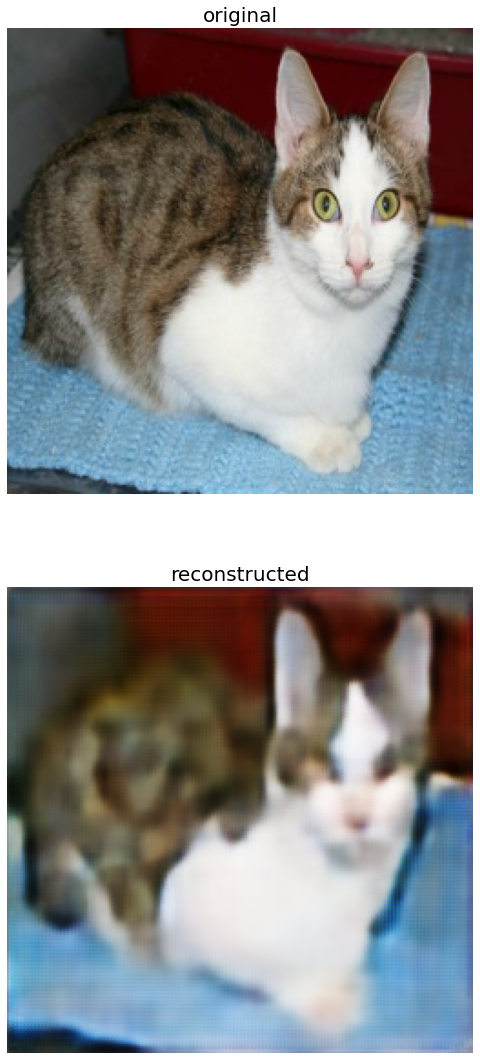

In [19]:
predict_finetuned_mobileNet = autoencoder_finetuned_mobileNet.autoencoder.predict(x=test_x_numpy)
plot_many_vs_reconstructed_(test_x_numpy,
                           predict_finetuned_mobileNet,
                           num_reconstuctin)

In [0]:
predict_pre_finetuned = autoencoder_pre_finetuned.autoencoder.predict(x=test_x_numpy)
predict_finetuned_mobileNet = autoencoder_finetuned_mobileNet.autoencoder.predict(x=test_x_numpy)
predict_finetuned_denseNet = autoencoder_finetuned_denseNet.autoencoder.predict(x=test_x_numpy)


In [0]:
plot_many_vs_reconstructed(test_x_numpy, predict_pre_finetuned,
                           predict_finetuned_mobileNet,
                           predict_finetuned_denseNet,
                           num_reconstuctin)

Output hidden; open in https://colab.research.google.com to view.

# Show Plots

In [0]:
import pandas as pd

In [0]:
path_to_logs = '/content/drive/My Drive/convAE_2_classifier/logs/'
csv_file_name = 'convAE_stacked256_64-128-256-512__model_history_20200323-152310.csv'

filename = path_to_logs + csv_file_name
data_AE = pd.read_csv(filename ,index_col=0)
print(filename)

In [0]:
path_to_logs = '/content/drive/My Drive/convAE_2_classifier/logs/'
csv_file_name = 'convAE_stacked-MobileNet256_64-128-256-512__model_history_20200326-095243.csv'

filename = path_to_logs + csv_file_name
data_AE_mobileNet = pd.read_csv(filename ,index_col=0)
print(filename)

In [0]:
path_to_logs = '/content/drive/My Drive/convAE_2_classifier/logs/'
csv_file_name = 'convAE_stacked-DenseNet256_64-128-256-512__model_history_20200325-210656.csv'

filename = path_to_logs + csv_file_name
data_AE_denseNet = pd.read_csv(filename ,index_col=0)
print(filename)

In [0]:
acc_min = 0.5
acc_max = 1.0

loss_min = 0
loss_max = 3.5

name_AE = 'convAE'
filters = '_64-128-256-512'
name_AE = name_AE + filters

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10,50))

data_AE[['loss']].plot(title=name_AE,ylim=(0.0, 0.0125),ax=axes[0])
axes[0].title.set_size(40)
data_AE_mobileNet[[ 'loss', 'val_loss']].plot(title='AE-mobileNet_loss', legend=True, ylim=(loss_min, loss_max), ax=axes[1])
data_AE_mobileNet[[ 'acc', 'val_acc']].plot(title='AE-mobileNet_accuracy', legend=True, ylim=(acc_min, acc_max),ax=axes[2])
data_AE_denseNet[[ 'loss', 'val_loss']].plot(title='AE-denseNet_loss', legend=True, ylim=(loss_min, loss_max), ax=axes[3])
data_AE_denseNet[[ 'acc', 'val_acc']].plot(title='AE-denseNet_accuracy', legend=True, ylim=(acc_min, acc_max), ax=axes[4])


fig.savefig(path_to_logs + 'plots_' + filters + '.jpg')

## Autoencoder Plot

In [0]:
name_AE = 'convAE'
filters = '_32-64-128-256'
name_AE = name_AE + filters

plot_AE = data_AE[['loss', 'lr']].plot( title=name_AE,
                                 legend=True,
                                 subplots=True,
                                 #figsize=(8, 8)
                                 )

## MobileNet Plot

In [0]:
name_mobileNet = 'convAE_MobileNet'
name_loss = name_mobileNet + filters +  '_loss' 

plot_mobileNet_loss = data_AE_mobileNet[[ 'loss', 'val_loss']].plot(title=name_loss, legend=True)

In [0]:
name_accuracy = name_mobileNet + filters +  '_accuracy' 

plot_mobileNet_acc = data_AE_mobileNet[[ 'acc', 'val_acc']].plot(title=name_accuracy, legend=True, ylim=(acc_min, acc_max))

## DenseNet Plot

In [0]:
name_mobileNet = 'convAE_DenseNet'
name_loss = name_mobileNet + filters +  '_loss' 

plot_denseNet_loss = data_AE_denseNet[[ 'loss', 'val_loss']].plot(title=name_loss, legend=True)

In [0]:
name_accuracy = name_mobileNet + filters +  '_accuracy' 

plot_denseNet_acc = data_AE_denseNet[[ 'acc', 'val_acc']].plot(title=name_accuracy, legend=True, ylim=(acc_min, acc_max))

# LAB Histograms



In [21]:
import cv2
!pip3 install opencv-contrib-python

In [0]:
test_x_numpy
predict_finetuned_mobileNet = autoencoder_finetuned_mobileNet.autoencoder.predict(x=test_x_numpy)
predict_finetuned_denseNet = autoencoder_finetuned_denseNet.autoencoder.predict(x=test_x_numpy)

In [0]:
def img_show(image, title='title'):
  plt.figure(figsize=(10,10))
  plt.imshow(image)
  plt.title(title, fontsize=20)
  plt.axis('off')

In [0]:
def rgb2lab_histogram(rgb_image):
  lab_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2LAB)
  l, a, b    = cv2.split(lab_image)
  l = l.flatten()
  a = a.flatten()
  b = b.flatten()
  a = (a/50.0)
  b = (b/50.0)
  max_a = np.amax(a)
  min_a = np.amin(a)
  max_b = np.amax(b)
  min_b = np.amin(b)
  print('a from: ' + str(min_a) + ' to ' + str(max_a) + '\n' + 'b from: ' + str(min_b) + ' to ' + str(max_b) + '\n' )
  fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,15))
  ax0, ax1, ax2 = axes.flatten()
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
  # plt.subplot(rgb_image)

  ax0.hist(l, bins=100, histtype='stepfilled', color='black')
  y_axis = ax0.axes.get_yaxis()
  y_axis.set_visible(False)
  ax0.tick_params(axis='x', which='major', labelsize=20)
  ax0.xaxis.set_ticks(np.arange(0, 101, 50))
  ax0.set_ylim([0,3000])
  ax0.set_title('L', fontdict ={'fontsize':20}, loc='left')

  ax1.hist(a, bins=256, histtype='stepfilled', range=[-1, 1], color='black')
  y_axis = ax1.axes.get_yaxis()
  y_axis.set_visible(False)
  ax1.tick_params(axis='x', which='major', labelsize=20)
  ax1.xaxis.set_ticks(np.arange(-1, 2, 1))
  ax1.set_ylim([0,3000])
  ax1.set_title('A', fontdict ={'fontsize':20}, loc='left')

  ax2.hist(b, bins=256, histtype='stepfilled', range=[-1, 1], color='black')
  y_axis = ax2.axes.get_yaxis()
  y_axis.set_visible(False)
  ax2.tick_params(axis='x', which='major', labelsize=20)
  ax2.xaxis.set_ticks(np.arange(-1, 2, 1))
  ax2.set_ylim([0,3000])
  ax2.set_title('B', fontdict ={'fontsize':20}, loc='left')

a from: -0.265 to 0.7353125
b from: -0.5425 to 0.9275



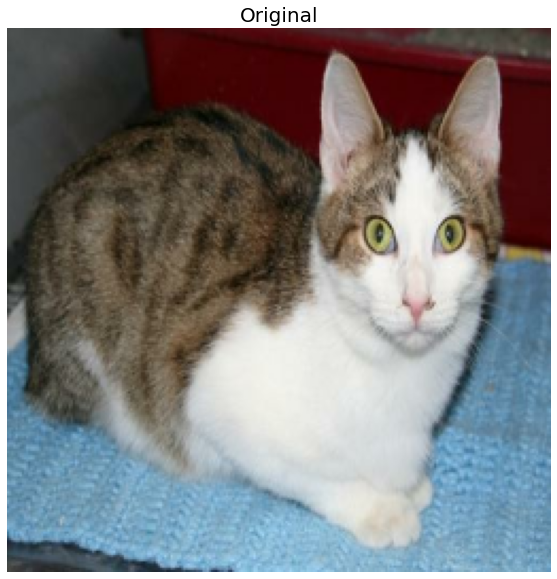

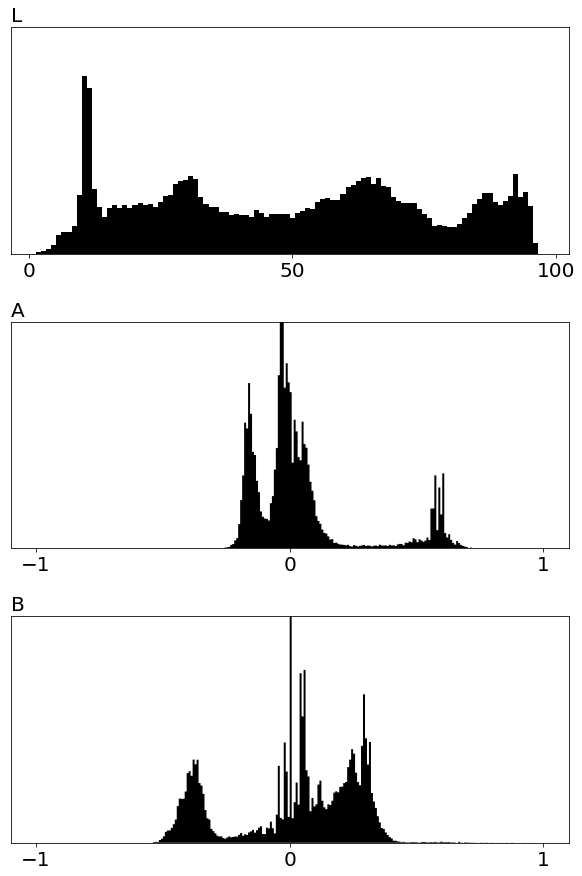

In [26]:
img_show(test_x_numpy[0], "Original")
rgb2lab_histogram(test_x_numpy[0])

a from: -0.355625 to 0.7215625
b from: -0.5828125 to 0.4959375



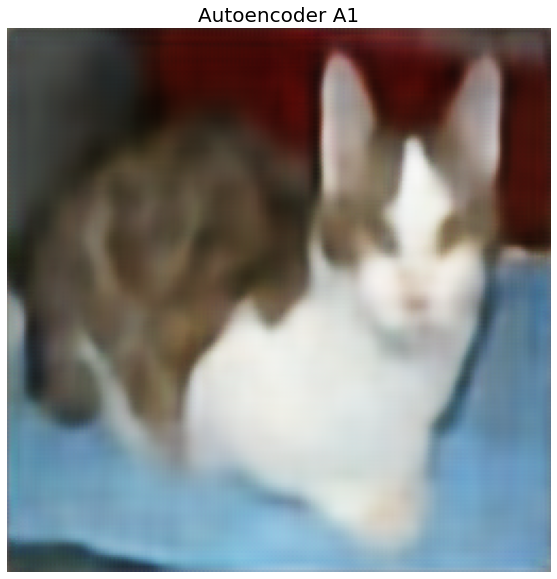

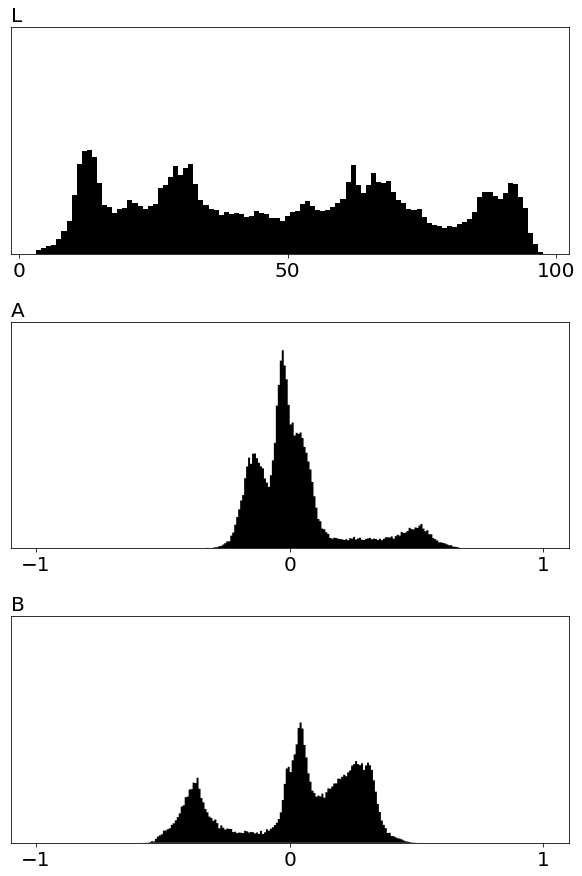

In [27]:
img_show(predict_pre_finetuned[0], "Autoencoder A1")
rgb2lab_histogram(predict_pre_finetuned[0])

a from: -0.441875 to 0.806875
b from: -1.1090626 to 0.815625



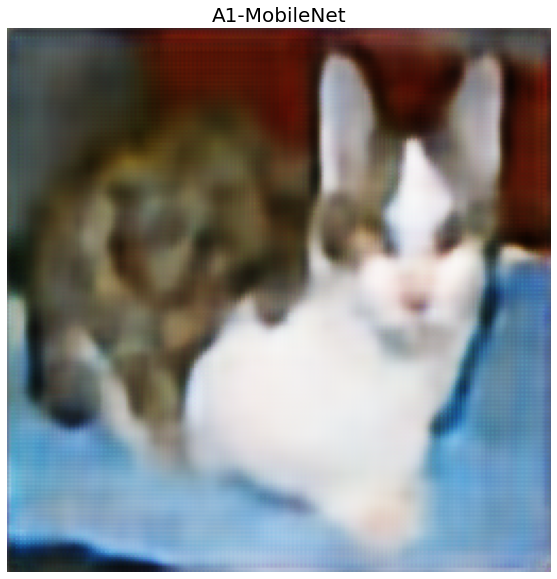

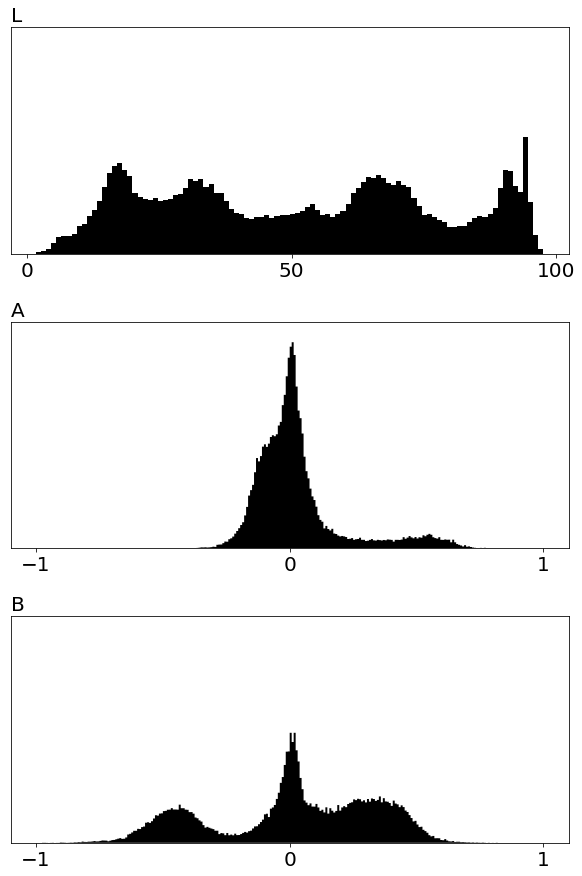

In [28]:
img_show(predict_finetuned_mobileNet[0], "A1-MobileNet")
rgb2lab_histogram(predict_finetuned_mobileNet[0])

a from: -0.6209375 to 0.8953125
b from: -0.90875 to 0.795625



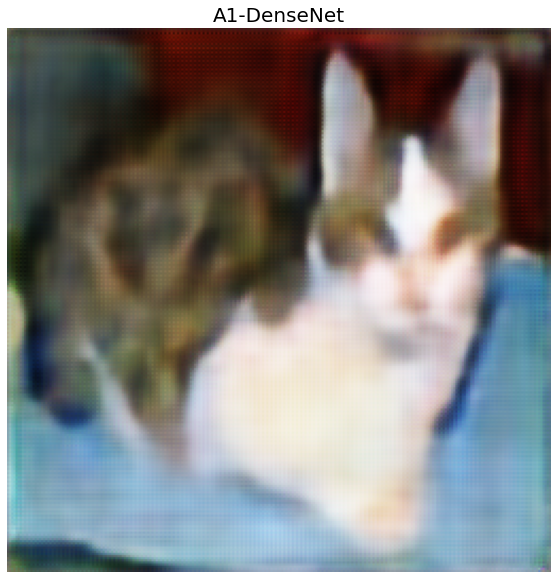

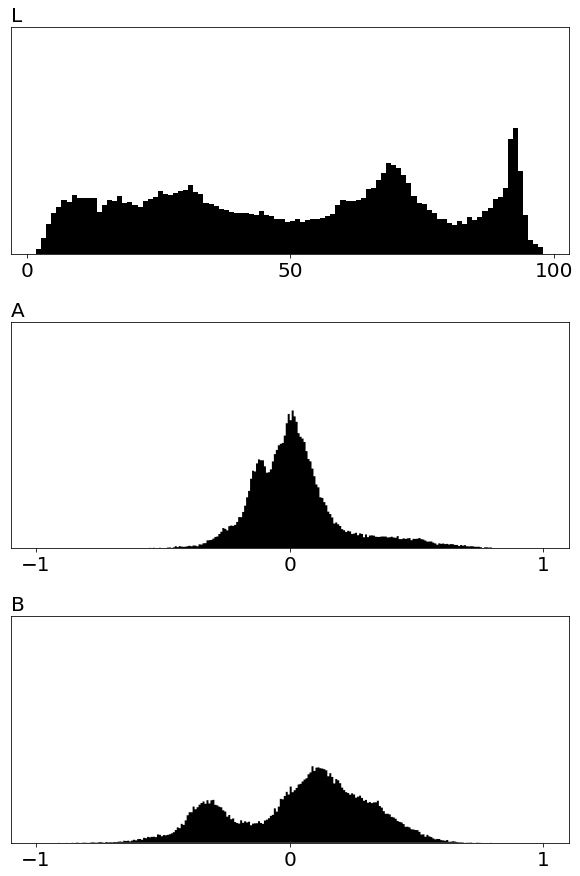

In [36]:
img_show(predict_finetuned_denseNet[0], "A1-DenseNet")
rgb2lab_histogram(predict_finetuned_denseNet[0])